Timestep k=1
State Estimate Before EKF=[4.55  0.005 0.003]
Observation=[4.721 0.143 0.006]
State Estimate After EKF=[ 3.854 -0.221 -0.488]


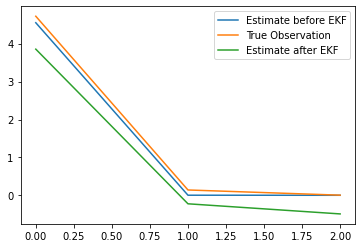


Timestep k=2
State Estimate Before EKF=[ 7.879 -2.325 -0.485]
Observation=[9.353 0.284 0.007]
State Estimate After EKF=[ 7.863 -1.094 -0.755]


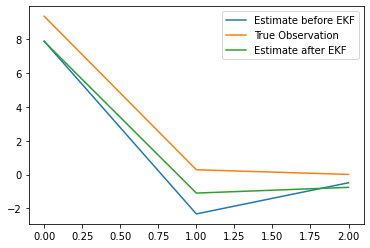


Timestep k=3
State Estimate Before EKF=[11.189 -4.174 -0.752]
Observation=[14.773  0.422  0.009]
State Estimate After EKF=[12.473 -1.694 -0.862]


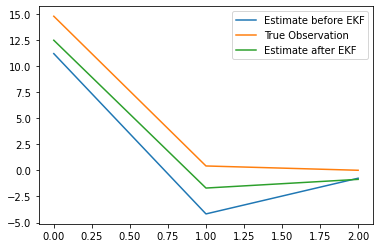

In [51]:
import numpy as np
import matplotlib.pyplot as plt
 
np.set_printoptions(precision=3,suppress=True)
 
A_k_minus_1 = np.array([[1.0,  0,   0],
                                                [  0,1.0,   0],
                                                [  0,  0, 1.0]])
 

process_noise_v_k_minus_1 = np.array([0.05,0.005,0.003])
     
Q_k = np.array([[1.0,   0,   0],
                                [  0, 1.0,   0],
                                [  0,   0, 1.0]])
                 

H_k = np.array([[1.0,  0,   0],
                                [  0,1.0,   0],
                                [  0,  0, 1.0]])
                         

R_k = np.array([[1.0,   0,    0],
                                [  0, 1.0,    0],
                                [  0,    0, 1.0]])  
                 

sensor_noise_w_k = np.array([1.50,0.57,0.94])
 
def getB(yaw, deltak):

    B = np.array([  [np.cos(yaw)*deltak, 0],
                                    [np.sin(yaw)*deltak, 0],
                                    [0, deltak]])
    return B
 
def ekf(z_k_observation_vector, state_estimate_k_minus_1, 
        control_vector_k_minus_1, P_k_minus_1, dk):

    state_estimate_k = A_k_minus_1 @ (
            state_estimate_k_minus_1) + (
            getB(state_estimate_k_minus_1[2],dk)) @ (
            control_vector_k_minus_1) + (
            process_noise_v_k_minus_1)
             
    print(f'State Estimate Before EKF={state_estimate_k}')
    
    plt.plot(state_estimate_k)

    P_k = A_k_minus_1 @ P_k_minus_1 @ A_k_minus_1.T + (
            Q_k)

    measurement_residual_y_k = z_k_observation_vector - (
            (H_k @ state_estimate_k) + (
            sensor_noise_w_k))
 
    print(f'Observation={z_k_observation_vector}')

    S_k = H_k @ P_k @ H_k.T + R_k

    K_k = P_k @ H_k.T @ np.linalg.pinv(S_k)

    state_estimate_k = state_estimate_k + (K_k @ measurement_residual_y_k)

    P_k = P_k - (K_k @ H_k @ P_k)

    print(f'State Estimate After EKF={state_estimate_k}')
    
    plt.plot(z_k_observation_vector)
    plt.plot(state_estimate_k)
    
    plt.legend(['Estimate before EKF', 'True Observation', "Estimate after EKF"])
    plt.show()

    return state_estimate_k, P_k
     
def main():

    state_estimate_k_minus_1 = np.array([0.0,0.0,0.0])

    control_vector_k_minus_1 = np.array([4.5,0.0])

    P_k_minus_1 = np.array([[0.1,  0,   0],
                                                    [  0,0.1,   0],
                                                    [  0,  0, 0.1]])
                             
    for k, obs_vector_z_k in enumerate(z_k,start=1):
     

        print(f'Timestep k={k}')  

        optimal_state_estimate_k, covariance_estimate_k = ekf(
            obs_vector_z_k, # Most recent sensor measurement
            state_estimate_k_minus_1, # Our most recent estimate of the state
            control_vector_k_minus_1, # Our most recent control input
            P_k_minus_1, # Our most recent state covariance matrix
            dk) # Time interval
         
        state_estimate_k_minus_1 = optimal_state_estimate_k
        P_k_minus_1 = covariance_estimate_k

        print()
    
 
main()